# Homework 1: Supervised Learning 1: Lab Questions

### Version 1.0



Zhijing Hu

**Instructions:**
This notebook is intended to guide you through creating and exploring your dataset. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

## Part 1: Defining the Problem and Choosing a Dataset
Things to do in this part:
1. Answer questions 1-4
2. Identify data sources to use in your dataset
3. List data sources used in question 5

Your first task is to choose a problem you're interested in. You are free to choose from any domain, but it should be within the **supervised learning** paradigm. In other words, a supervised classifier should be able to generalize from a training sample of $(X,y)$ pairs to predict outcomes on unseen data $x$. We want to use machine learning, so your problem should be difficult to solve using traditional programming algorithms. 

For simplicity, you will construct data for a binary or multiclass classification problem, where the possible labels are given by a fixed set of choices, or for a regression task (real-valued labels). Do not build a dataset for a structured prediction task.


#### 1) In one or two sentences, what are you interested in predicting given what data? This is your supervised learning problem.

You should answer this question before creating your dataset, as it will provide an indication of what to search for.

The purpose of our analysis will focus on bikeshare data analysis. Nowadays, the bikesharing become more and more popluar in amounts of cities. Predicting how specific factors (weeks, days, seasons, etc.) impact the duration of bikesharing and several factors would better help the bikeshare service to develop and improve in the near future.

#### 2) Is this a well-defined problem? Why or why not? What ambiguities (if any) exist in your problem?

Think about what challenges you solved by formulating the problem in this way.

No, it is not a well-define problem, since we only sorting and predicting the datas but not giving the exact solutions for how to better develop the bikeshare service. As for ambiguities, from our prespective, it might be the duration of bikesharing would not be such clear for understanding before study the relationship between the used data and itself in the lab.

#### 3) Does an easy (non-ML) solution exist for the problem? What are existing ways this problem, or a similar problem, is addressed (regardless of difficulty)?

There is no easy solution exists for this problem. The existing ways to solve the similar problem, such as car rental, is increasing the numbers of available car in specific car rental market when meeting high demands of car renting. 

#### 4) Why is using machine learning for this problem justified?

Since using machine learing could be a easy and helpful approach to handle a huge amount of user data, predict the usage of bikeshare and scope the improvement of bikeshare service in certain area.

Now, we'll turn to data we can use to actually solve your problem. You may wish to use Section 3.1 of the assignment sheet for inspiration. **Remember, you are expected to *create* a dataset, not use an existing one**.

#### 5) List the sources for all data you used when creating your dataset along with (very briefly) what you obtained from it.

For example: <br /> Obtained features a,b,c from http://www.domain1.com/example_data. <br /> Obtained labels from http://www.domain2.com/example_labels.

Here is the resource link of our data: https://www.capitalbikeshare.com/system-data

## Part 2: What does the data look like?
Things to do in this part:
1. Answer questions 6-11
2. Print a few examples of raw data (if possible) otherwise explain what the raw data looks like.
3. Create at least 3 numerical features from your raw data
4. Create dataset such that $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ are both numpy arrays
5. Create 1 visual that helps you understand your data.

Let's take a look at the various data you've collected. First let's read in the raw data. You may read the data into whatever is most convenient (e.g. a list, a numpy array, a Pandas dataframe, etc.). **At this point your data will be in whatever format you downloaded them in**. For example, if you're working with text data, your data might be strings of words or collection of text documents. If you are working with image data, you might have a collection of images.
<br /><br />
For those of you new to working with data in Python, we have included examples of how to import the raw data. These are merely suggestions if they work for you. You don't have to use them.

In [1]:
# # Suppose you have a directory called documents that contains Wikipedia articles, you can process these as follows:
# # Cleaning the data (e.g. removing stop words) is not required.
# import os
# from collections import defaultdict

# files = [f for f in os.listdir('documents') if os.path.isfile(os.path.join('documents', f))
# X = defaultdict(list)
# for i, file in enumerate(files[:len(files)], start=1):
#     with open(os.path.join('documents', file)) as f:
#         X['doc_' + str(i)] = f.readlines()
# # X is a dictinary that maps doc_id to text.

# # Suppose you have labels that are stored in a CSV file:
# import pandas as pd

# y = pd.read_csv('labels.csv')
# # y is a Pandas dataframe that contains each label.

# # Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
# from PIL import Image

# images = [f for f in os.listdir('images') if os.path.isfile(os.path.join('images', f))
# X = [Image.open(image) for image in images]
# # X is a list of PIL Image objects

#######################################################
# TODO: Read in your raw data
import pandas as pd
import glob
import os
#bikeshare = pd.read_csv('201912-capitalbikeshare-tripdata.csv')

bikeshare = pd.concat(map(pd.read_csv, glob.glob(os.path.join(r"C:\Users\47637\Desktop\HW1", "capitalbikeshare-tripdata-*.csv"))), ignore_index= True)


X = bikeshare.loc[:, bikeshare.columns != 'Duration']
y = bikeshare['Duration']
#######################################################

In [2]:
bikeshare

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member
...,...,...,...,...,...,...,...,...,...
3398412,130,2019-12-31 23:57:36,2019-12-31 23:59:46,31011,Crystal Dr & 23rd St S,31009,Crystal Dr & 27th St S,W21285,Member
3398413,664,2019-12-31 23:57:47,2020-01-01 00:08:51,31125,15th & W St NW,31281,8th & O St NW,W24197,Member
3398414,389,2019-12-31 23:59:37,2020-01-01 00:06:06,31047,Braddock Rd Metro,31085,Mount Vernon Ave & E Nelson Ave,W21281,Member
3398415,962,2019-12-31 23:59:38,2020-01-01 00:15:40,31236,37th & O St NW / Georgetown University,31214,17th & Corcoran St NW,W00534,Member


Now, let's print a few examples. Depending on your data format, you may have to write this yourself. We have provided some examples below.

In [3]:
#######################################################
# TODO: print out what a few examples of your raw data.
print('X:', X[:5])
print('y:', y[:5])
#######################################################

X:             Start date             End date  Start station number  \
0  2019-01-01 00:04:48  2019-01-01 00:08:39                 31203   
1  2019-01-01 00:06:37  2019-01-01 00:32:27                 31321   
2  2019-01-01 00:08:46  2019-01-01 00:11:44                 31104   
3  2019-01-01 00:08:47  2019-01-01 00:12:35                 31281   
4  2019-01-01 00:12:29  2019-01-01 00:34:10                 31014   

                   Start station  End station number  \
0     14th & Rhode Island Ave NW               31200   
1  15th St & Constitution Ave NW               31114   
2    Adams Mill & Columbia Rd NW               31323   
3                  8th & O St NW               31280   
4           Lynn & 19th St North               31923   

                                         End station Bike number Member type  
0               Massachusetts Ave & Dupont Circle NW      E00141      Member  
1                           18th St & Wyoming Ave NW      W24067      Casual  
2  Woodl

#### (Optional) If your raw data format can't be displayed in a Jupyter notebook (e.g. video or audio files), you may skip the above step. You should still look at the raw data in whatever way possibly, but instead just describe what the raw data is that you look at.

#### 6) What information is contained in each example (row) in $X$? These are your raw data features.

- Duration – Duration of trip
- Start Date – Includes start date and time
- End Date – Includes end date and time
- Start Station number – the station number when the user starts trip
- Start Station - the station name when the user starts trip
- End Station number – the station number when the user ends trip
- End Station  – the station  when the user ends trip
- Bike Number – Includes ID number of bike used for the trip
- Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

In [4]:
bikeshare.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

If your data is not numerical, this will be difficult for an algorithm to learn directly. So, now that you've seen what the raw data looks like, you will start extracting *numerical* features from the raw data.
<br /><br />
We obtain features through a process called **feature engineering**. Features may be derived from the existing raw data or may come from other data sources that can be associated with each example. This is a challenging task that often requires domain knowledge about the problem you are trying to solve. 
<br /><br />
While very important in dataset creation, feature engineering is not the focus of this assignment. You will need some features for the other steps, but these can be very simple and don't need to rely on domain knowledge.
<br /><br />
**You will need to add at least 3 features to your dataset**. If your data is Wikipedia documents, possible features could be number of sentences, word count, the words that appear in the article, number of document revisions, number of contributing authors, number of references, etc. Notice that some of these features could be derived from the raw data (i.e. the words) while others may need to be downloaded separately (i.e. page metadata). If your data are cat images, your features could be focus measure (i.e. blurriness/sharpness) using OpenCV Variance of Laplacian, whether image is grayscale, number of pixels, the pixel color values, etc.
<br /><br />
You are free to obtain features in any way you like as long as you can justify why the features your propose should help solve the problem you've defined.
<br /><br />
We'll provide some examples of what we're looking for. We are not expecting anything fancy for this step.

In [5]:
#######################################################
# TODO: compute features for each example
#######################################################
#member type
bikeshare['Member type'].value_counts()

Member    2957256
Casual     441161
Name: Member type, dtype: int64

In [6]:
cleanup_nums = {"Member type": {"Member": 1 , "Casual": 0 }}
bikeshare = bikeshare.replace(cleanup_nums)
bikeshare.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,1
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,0
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,0
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,1
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,1


In [7]:
#weekday
bikeshare['Day of week'] = pd.to_datetime(bikeshare['Start date'], format='%Y-%m-%d %H:%M:%S').dt.day_name()
cleanup_nums = {"Day of week": {"Monday": 1 , "Tuesday": 2, "Wednesday" : 3, "Thursday": 4, "Friday": 5, "Saturday":6, "Sunday":7 }}
bikeshare = bikeshare.replace(cleanup_nums)
bikeshare.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Day of week
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,1,2
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,0,2
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,0,2
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,1,2
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,1,2


In [8]:
#season
bikeshare['Season'] = pd.to_datetime(bikeshare['Start date'], format='%Y-%m-%d %H:%M:%S').dt.month_name()
cleanup_nums = {"Season": {"January": 1 , "February": 1, "March" : 1, "April": 2, "May": 2, "June": 2, "July":3 ,
                          "August" : 3, "September": 3, "October": 4, "November" : 4, "December": 4}}
bikeshare = bikeshare.replace(cleanup_nums)
bikeshare.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Day of week,Season
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,1,2,1
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,0,2,1
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,0,2,1
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,1,2,1
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,1,2,1


#### 7) Describe the features in your dataset.

We added three features: 
- member type: 0 for Casual and 1 for Member. We convert the categorical value into binary, and this will help us better to understand the relationship with duration .
- Day of week: we extract day from the start date and turn it into day of week. We encode by stating Monday as 1 and vice versa, Sunday with 7. With the day of week variable, we can analyze the duration change within the week.
- Season: we extract month from the start date and encode it into season. We put spring months in 1 and vice versa, winter months as 4. 

Next, let's focus on what you're trying to predict. First, let's see what the potential outcomes look like.

In [9]:
import numpy as np

np.unique(y)

array([   60,    61,    62, ..., 86289, 86351, 86365], dtype=int64)

#### 8) Is your dataset suitable for a regression or classification task? Explain.

The dataset is suitable for a regression analysis. Our y, the predicting variable is a continuous variable. We want to find the correlations between dependent variable (duration)and independent variables(the rest of the data).  

Now, we'll standardize our data as follows. The data matrix $X$ should be a numpy 2d array in $\mathbb{R}^{m\times n}$. The labels should be a numpy 1d array in $\mathbb{R}^m$. $m$ is the number of examples and $n$ is the number of features. **You will be training your supervised classifer on the features, which might not include all (or any) of the raw data**. This is a decision you will make when creating your dataset.
<br /><br />
Note: this is the format we're looking for your data to be in when you submit your dataset (i.e. $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ and are both numpy arrays).

In [10]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
import numpy as np
X = bikeshare[['Member type','Day of week','Season']].to_numpy()
y = bikeshare[['Duration']].to_numpy()
#######################################################

In [11]:
X

array([[1, 2, 1],
       [0, 2, 1],
       [0, 2, 1],
       ...,
       [1, 2, 4],
       [1, 2, 4],
       [1, 2, 4]], dtype=int64)

In [12]:
y

array([[ 230],
       [1549],
       [ 177],
       ...,
       [ 389],
       [ 962],
       [ 183]], dtype=int64)

If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [13]:
# for i in np.unique(y):
#     print(f'{len(y[y==i])} examples of class {i}')

#### 9) Classification: Is your dataset balanced or imbalanced?


Regression: How are your labels distributed? Normal distrbution? Uniform within a range? etc.

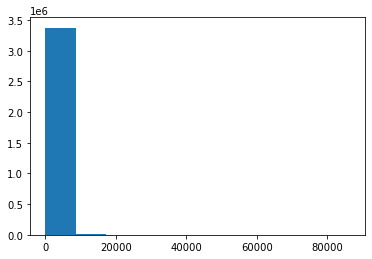

In [14]:
import matplotlib.pyplot as plt
plt.hist(bikeshare['Duration'])
plt.show()

In [15]:
print(bikeshare['Duration'].describe())

count    3.398417e+06
mean     1.069698e+03
std      2.205485e+03
min      6.000000e+01
25%      3.960000e+02
50%      6.800000e+02
75%      1.152000e+03
max      8.636500e+04
Name: Duration, dtype: float64


In [16]:
print("Highest allowed",bikeshare['Duration'].mean() + 3*bikeshare['Duration'].std())
print("Lowest allowed",bikeshare['Duration'].mean() - 3*bikeshare['Duration'].std())

Highest allowed 7686.153074434254
Lowest allowed -5546.756937938939


In [17]:
new_bikeshare = bikeshare[(bikeshare['Duration'] < 7687) & (bikeshare['Duration'] > 0)]

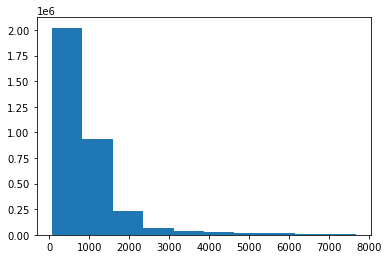

In [18]:
plt.hist(new_bikeshare['Duration'])
plt.show()

The y variable is not normally distributed. It is right skewed to very large numbers on the right. After using the Inter-Quartile Range (IQR) proximity rule to remove the outliers, the distribution of y is still right skewed but our prediction will be more reliable since some extreme length of renting bikes might be problematic. 

Let's compute some statistics for the dataset.

In [19]:
#######################################################
print(f'Number of : {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# TODO: if applicable, please include any additional dataset statistics here
#######################################################

print(bikeshare['Duration'].describe())

Number of : 3398417
Number of features per example: 3
count    3.398417e+06
mean     1.069698e+03
std      2.205485e+03
min      6.000000e+01
25%      3.960000e+02
50%      6.800000e+02
75%      1.152000e+03
max      8.636500e+04
Name: Duration, dtype: float64


In [20]:
bikeshare['Season'].value_counts()

3    1076914
2    1035840
4     722942
1     562721
Name: Season, dtype: int64

In [21]:
bikeshare['Day of week'].value_counts()

3    513457
5    510515
2    510178
4    503090
6    496048
1    465170
7    399959
Name: Day of week, dtype: int64

In [22]:
bikeshare['Member type'].value_counts()

1    2957256
0     441161
Name: Member type, dtype: int64

#### 10) Do you have lots of high quality data? Explain limitations (if any) that exist in terms of data quantity and quality.

Looking at the statistics we pulled above: we have a full year round of data to analysis, which is good because we can understand the seasonality here. 

Data visualizations help us understand our data and draw insights. Just like there is no single ML algorithm that applies to every problem, there isn't a visualization that works for every dataset.
<br /> <br />
Instead, you will produce some visuals that you think tell an interesting story about your data. We will provide some suggestions, which you can use for inspiration. 
<br /> <br />

Types of information you may wish to capture (this is by no means comprehensive):
*   Missingness of data (consider using heat maps, scatter plots)
*   Correlation of features (consider using a correlation matrix)
*   Distribution of data (consider using historgrams, violin plots)
*   Linear separability, if you have binary classification
<br /> <br />

Check out these visualization galleries for further inspiration and example code:
*   [Seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Python Graph Gallery](https://python-graph-gallery.com/)

You should create **at least 1 visualization** for your dataset and explain what you learned about your data from it. Below is an example heatmap showing correlation of features from the sklearn iris dataset.

<AxesSubplot:xlabel='Day of week'>

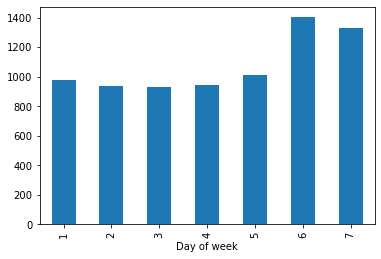

In [23]:
import numpy as np
import seaborn as sns

bikeshare[['Day of week', 'Duration']].groupby('Day of week').mean().plot(kind='bar', legend=None)

- People may use rent bikes for a longer time during weekends than weekday. 

<AxesSubplot:xlabel='Season'>

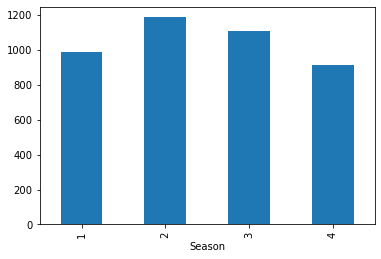

In [24]:
bikeshare[['Season', 'Duration']].groupby('Season').mean().plot(kind='bar', legend=None)

- People spent more time in bike renting during summer and fall quarter. 

#### 11) What insights do you gain from this visualization about your dataset?

In conclusion, people may rent bikes for a longer time during weekends than weekday and spend more time in bikesharing during summer and fall quarter.

## Part 3: Using your dataset

Things to do in this part:
1. Answer questions 12-13
2. Perform a train-test split
3. Train simple supervised learning algorithm on dataset

Now that you have created your dataset and explored some of its properties, you will use a supervised classifier to predict the outcome you definined in the problem statement. To evaluate how well this classifier predicts the outcomes, you will need to set some data aside for testing. First, you'll use sklearn to split the data into train and test sets, with 25% of the data reserved for testing.

In [25]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples{ {X_test.shape[0]}}')

Training examples: 2548812
Testing examples{849605}


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [26]:
import numpy as np 

np.savetxt("X_train.csv", X_train[0:1000], delimiter=",")
np.savetxt("X_test.csv", X_test[0:1000], delimiter=",")
np.savetxt("y_train.csv", y_train[0:1000], delimiter=",")
np.savetxt("y_test.csv", y_test[0:1000], delimiter=",")

# zip together all components of your dataset
!zip  homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

'zip' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


Now, let's train some classifiers or regression models. You are encouraged to try out multiple different algorithms, but only one is required. You are also encouraged to use popular packages such as [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model); you are not expected to implement any of these algorithms yourself. We have included sklearn's Logistic Regression and Linear Regression algorithms below as examples.
<br /><br />
Consider trying the following algorithms:
<br />
Classification: SVM, Decision Tree, Random Forest
<br />
Regression: Lasso, ridge regression

In [27]:
# # If you have a classification problem, here is how to train a Logistic Regression classifier

# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# y_hat = clf.predict(X_test)
# accuracy = clf.score(X_test, y_test)
# print(f'model accuracy is {accuracy}')

# # If you have a regression problem, here is how to train a Linear Regression classifier

# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train, y_train)
# y_hat = reg.predict(X_test)
# r_squared = reg.score(X_test, y_test)
# print(f'Goodness of fit given by coefficient of determination is {r_squared}')

#######################################################
# TODO: Train at least one simple supervised learning algorithm on your dataset

#######################################################
#  linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

# random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)

<ipython-input-27-05fab380380d>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


#### 12) How can you meaningfully evaluate results?  How was the performance of your model: did it meee?
*Note:* if you trained more than one model above, you only need to answer this question for one of them.

In [28]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, prediction_lr)
mse_rf = mean_squared_error(y_test, prediction_rf)
print('linear regression mse: ', mse_lr)
print('random forest regression mse: ', mse_rf)

linear regression mse:  4605120.679935226
random forest regression mse:  4595893.932621505


Since this is a regression model, I pull out the mean squared error for both of the model. The random forest regression model reduced the mean squared error than the linear regression model. 

#### 13) In creating your dataset, what discussions did you have about the ethical implications of what you were collecting? Are there any potential issues with fairness?

For ethical implications, those data involved the location details (start locations, destinations, etc.) and duration times of the bikeshare users that might be private for them without permission. And for fairness issues, from our perspective, the answer is no. 

## Submit
Great work! You're all done.

Make sure to submit this Python notebook (as a PDF) and the dataset you created as a zip file. See the homework writeup for directions.